測試資料
---
1. How to get the data, 如何下載資料
- Use the database, 如何使用資料庫
- Technical index introduction, 引進技術指標
- TSM as the study case, 用台積電當例子

Note
---
1. has to install all the required packages, for instance, talib. install by pip:
```
> pip install yfinance
```

In [1]:
# To get rid of not necessay warnings, 

import warnings
warnings.filterwarnings(action='ignore')

- put all the python files in same directory.

In [2]:
%load_ext watermark

In [3]:
%watermark -a "diffusion" -u -n -t -z -v -m -p pandas,pandas_datareader,matplotlib,plotly

diffusion 
last updated: Wed Sep 23 2020 10:34:53 CST

CPython 3.6.9
IPython 7.16.1

pandas 1.1.2
pandas_datareader 0.9.0
matplotlib 3.3.0
plotly 4.9.0

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import pandas as pd
from pandas_datareader import data as web

import datetime as dt
from datetime import date
import gc

import numpy as np

import yfinance as yf
yf.pdr_override()

%matplotlib inline

In [6]:
# set the day as today

today = date.today()

In [7]:
# Observe duration we want to observe

start = dt.datetime(2019, 1, 1)
end = today

In [8]:
AAPL='AAPL'
AAPL_t='蘋果'

TSM='2330.TW'
TSM_t='台積電'
MediaT='2454.TW'
MediaT_t='聯發科'
Macronix='2337.TW'
Macronix_t='旺宏電子'
TSLA="TSLA"
TSLA_t="特斯拉"


In [9]:
def get_stock(target,start,end):
    df=web.get_data_yahoo([target],start, end)
    #df.fillna(method='ffill',inplace=True)
    #df.fillna(method='bfill',inplace=True)
    return df

In [10]:
df_AAPL=web.get_data_yahoo([AAPL],start, end)

[*********************100%***********************]  1 of 1 downloaded


In [11]:
df_TSM=web.get_data_yahoo([TSM],start, end)

[*********************100%***********************]  1 of 1 downloaded


In [12]:
df_MediaT=web.get_data_yahoo([MediaT],start, end)

[*********************100%***********************]  1 of 1 downloaded


In [13]:
df_Macronix=web.get_data_yahoo([Macronix],start, end)

[*********************100%***********************]  1 of 1 downloaded


In [14]:
df_TSLA=web.get_data_yahoo([TSLA],start, end)

[*********************100%***********************]  1 of 1 downloaded


In [15]:
len(df_AAPL),len(df_TSM)

(436, 417)

To store the data, create a new subdirectory, "csv"

In [16]:
# Save the data

df_TSM.to_csv("csv/tsm.csv")

In [16]:
# load saved data

df1=pd.read_csv("csv/tsm.csv",index_col="Date")

In [17]:
# look the data 

df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,226.5,226.5,219.0,219.5,204.53,32900482
2019-01-03,214.0,218.0,214.0,215.5,200.80,34087620
2019-01-04,211.5,211.5,206.5,208.0,193.82,65943521
2019-01-07,212.0,214.0,211.0,213.0,198.48,35442176
2019-01-08,212.0,212.5,210.0,211.0,196.61,22694481


In [20]:
del df1

Merge all the data together

In [18]:
df=df_AAPL[['Close']].copy()

In [19]:
df.rename(columns={'Close':'AAPL'},inplace=True)

In [20]:
df['TSM']=df_TSM['Close']

df['TSLA']=df_TSLA['Close']

Practice
---
As above, merge the others' data:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 436 entries, 2018-12-31 to 2020-09-22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    436 non-null    float64
 1   TSM     403 non-null    float64
 2   TSLA    436 non-null    float64
dtypes: float64(3)
memory usage: 13.6 KB


Above shows the lengths of columns are different since the trading dates are different between Taiwan's and USA's markets.

The empty data, "NaN", would be set the same as the previous "Close", as the following: `ffill`. 

In [22]:
df.fillna(method='ffill',inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 436 entries, 2018-12-31 to 2020-09-22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    436 non-null    float64
 1   TSM     435 non-null    float64
 2   TSLA    436 non-null    float64
dtypes: float64(3)
memory usage: 13.6 KB


In [24]:
df.head()

,AAPL,TSM,TSLA
Date,,,
2018-12-31,39.44,NaN,66.56
2019-01-02,39.48,219.5,62.02
2019-01-03,35.55,215.5,60.07
2019-01-04,37.06,208.0,63.54
2019-01-07,36.98,213.0,66.99


Question 
---
How to fill the first "NaN" in TSM column? <font color="white">"bfill"</font>

In [25]:









df.fillna(method='bfill',inplace=True)

<AxesSubplot:xlabel='Date'>

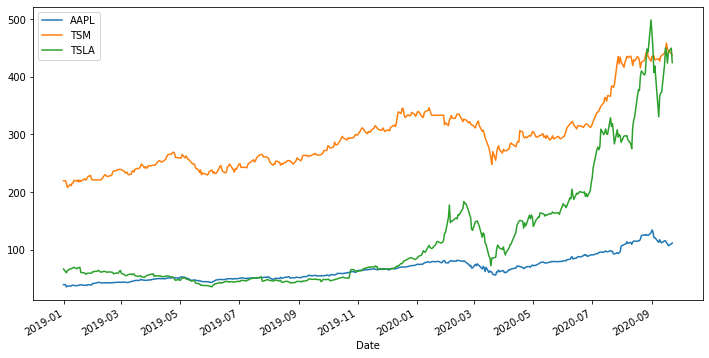

In [28]:
# Show time
df.plot(figsize=[12,6])

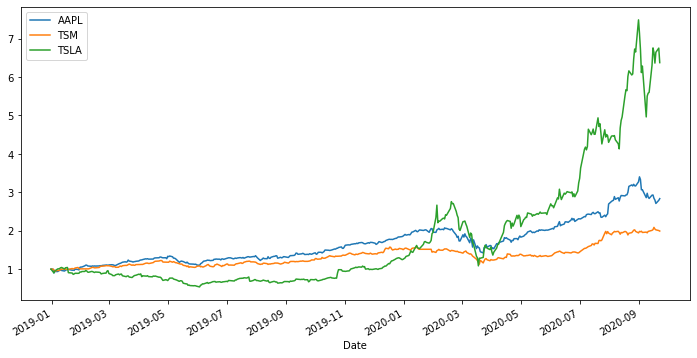

In [30]:
# Relative values 

(df/df.iloc[0]).plot(figsize=[12,6]);

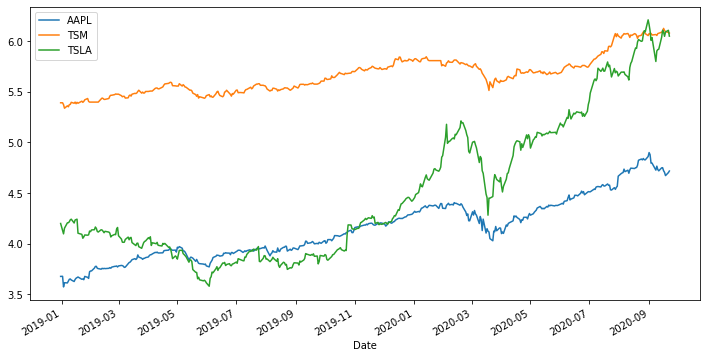

In [31]:
# Relative values 

np.log(df).plot(figsize=[12,6]);

In [32]:
df1=df.copy()
df1['Mean']=(df1['AAPL']+df1['TSLA'])/2

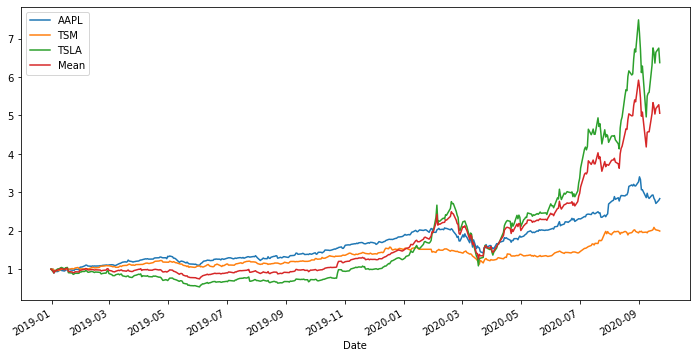

In [33]:
# Relative values 

(df1/df1.iloc[0]).plot(figsize=[12,6]);

In [34]:
df1.corr()

,AAPL,TSM,TSLA,Mean
AAPL,1.000000,0.956458,0.930038,0.951717
TSM,0.956458,1.000000,0.876509,0.899389
TSLA,0.930038,0.876509,1.000000,0.997936
Mean,0.951717,0.899389,0.997936,1.000000


In [35]:
del df1

In [36]:
Return=np.log(df/df.shift(1))
Return=Return.dropna()


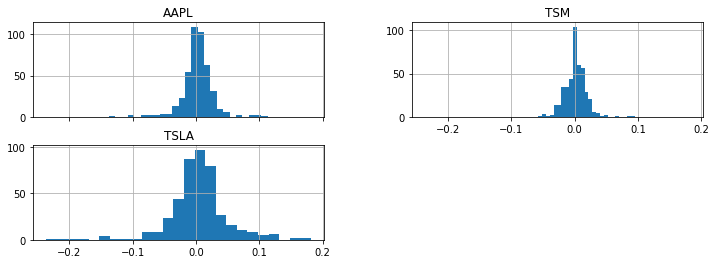

In [42]:

Return.hist(bins=25,figsize=(12,4),sharex=True);

In [38]:
Return.hist?

Execellent visualization, right? But we can  do this better by plotly!

In [57]:
pd.options.plotting.backend ="plotly"

In [59]:
P=Return.plot(kind="hist", opacity=0.6, bins=25,title=" Returrns of Comanies")

In [60]:
P.show()

As expected, more flexibly than matplotlib redering. You can try other otionals: 
```
histnorm='probability density',
marginal='box',
```

In [46]:
Ret_mean=Return.mean()*252
Ret_mean

AAPL    0.603653
TSM     0.398902
TSLA    1.072982
dtype: float64

In [47]:
Ret_cov=Return.cov()*252
Ret_cov

,AAPL,TSM,TSLA
AAPL,0.147209,0.013490,0.132165
TSM,0.013490,0.071898,0.025745
TSLA,0.132165,0.025745,0.553294


In [48]:
Ret_cor=Return.corr()
Ret_cor

,AAPL,TSM,TSLA
AAPL,1.000000,0.131121,0.463096
TSM,0.131121,1.000000,0.129080
TSLA,0.463096,0.129080,1.000000


Suppose that we want to invest for three target, $\mathbf{X}=(X_{AAPL},X_{TSM},X_{TSLA})$, with weight $\mathbf{w}=(w^1,w^2,w^3), ||\mathbf{w}||=w^1+w^2+w^3=1$, then the total profit and valatility are
\begin{eqnarray}
\text{Profit}&=&E\left(\mathbf{w}\cdot \mathbf{P}\right)=\sum_i w^i E\left(P_i\right)\\
\text{Volatility}&=&\sqrt{\text{cov}(\mathbf{w P})}=\sqrt{\mathbf{w}\text{cov}(\mathbf{P})\mathbf{w}^T}
\end{eqnarray}
where $\mathbf{P}$ is the profit matrix with respect to $\mathbf{X}$.

In [49]:
x=np.random.random(len(df.columns))
w=x/x.sum()
w

array([0.40026196, 0.10047128, 0.49926676])

In [50]:
R_Bin=np.sum(w*Ret_mean)
R_Bin

0.817402066835168

In [51]:
vol_Bin=np.sqrt(np.dot(w,np.dot(Ret_cov,w.T)))
vol_Bin

0.4676740043406141

In [54]:
print("Portfolio: ",list(df.columns))

print("Weights: %6.4f, %6.4f" %(w[0],w[1]))

print(r"Profit, %6.4f, with volatility, $pm$ %6.4f" %(R_Bin,vol_Bin))

Portfolio:  ['AAPL', 'TSM', 'TSLA']
Weights: 0.4003, 0.1005
Profit, 0.8174, with volatility, $pm$ 0.4677


In [12]:
df_TSM.fillna(method='ffill',inplace=True)
df_TSM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2020-01-02 to 2020-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       173 non-null    float64
 1   High       173 non-null    float64
 2   Low        173 non-null    float64
 3   Close      173 non-null    float64
 4   Adj Close  173 non-null    float64
 5   Volume     173 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


In [13]:
df_MediaT.fillna(method='ffill',inplace=True)
df_MediaT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2020-01-02 to 2020-09-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       172 non-null    float64
 1   High       172 non-null    float64
 2   Low        172 non-null    float64
 3   Close      172 non-null    float64
 4   Adj Close  172 non-null    float64
 5   Volume     172 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.4 KB


In [14]:
df_Macronix.fillna(method='ffill',inplace=True)
df_Macronix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2020-01-02 to 2020-09-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       172 non-null    float64
 1   High       172 non-null    float64
 2   Low        172 non-null    float64
 3   Close      172 non-null    float64
 4   Adj Close  172 non-null    float64
 5   Volume     172 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 9.4 KB


In [15]:
stocks = {}

In [16]:
stocks['AAPL']=df_AAPL[['Close','High','Low']].copy()


In [17]:
stocks['TSM']=df_TSM[['Close','High','Low']].copy()


In [18]:
stocks['MediaT']=df_MediaT[['Close','High','Low']].copy()


In [19]:
stocks['Macronix']=df_Macronix[['Close','High','Low']].copy()


In [21]:
from talib import abstract
import talib as ta
%matplotlib  inline

In [22]:

import functions
import plotting

In [23]:
def add_MA(df_,num=5,nbdev=2,timeperiod=21):
    stddev = nbdev
    timeperiod = timeperiod
    MACD_FAST = 12
    MACD_SLOW = 26
    MACD_SIGNAL = 9
    
    df=df_.copy()
    
    df['k'], df['d'] = ta.STOCH(df['High'], df['Low'], df['Close'])
    df['k'].fillna(value=0, inplace=True)
    df['d'].fillna(value=0, inplace=True)
    
    df['close']=df['Close'].values
    new_MA='MA'+str(num)
    #df.fillna(method='ffill',inplace=True)
    df[new_MA]=abstract.SMA(df,num).values
    
    closed=df['Close'].values
    #ta.BBANDS(closed,matype=ta.MA_Type.SMA)
    Upper_band, Middle_band, Lower_band = \
                ta.BBANDS(
                    #close narray 
                    closed, 
                    #time default 20
                    timeperiod=timeperiod,
                    # number of non-biased standard deviations from the mean
                    nbdevup=stddev,
                    nbdevdn=stddev,
                    # Moving average type: simple moving average here
                    matype=0)
    
    df['Upper_band']=Upper_band
    df['Lower_band']=Lower_band
    df.fillna(method='bfill',inplace=True)
    
    df['MACD'], df['Signal'], df['MACDHist'] = \
        ta.MACD(df.Close.values, fastperiod=MACD_FAST, slowperiod=MACD_SLOW, signalperiod=MACD_SIGNAL)

    
    
    df.drop(['close'],axis=1,inplace=True)
    return df

In [25]:
df11=add_MA(stocks['TSM'],num=21,nbdev=2) 

In [26]:
coms=['AAPL','TSM','MediaT','Macronix']

In [27]:
coms_t=[AAPL_t,TSM_t,MediaT_t,Macronix_t]

In [28]:
def daily_trade(df_,period=100,ubound=0.03,lbound=0.03,coms='Coms',coms_t=''):
    df=df_.copy()
    profit, trades = functions.bb_trading(df.iloc[-period:,:], u=ubound, l=lbound,coms=coms)
    #plotting.macd(df,period,coms=coms,tt=coms_t)
    MACD_other(df,period,coms='Coms',coms_t=coms_t)
    kd_df(df,period,coms='Coms',coms_t=coms_t)
    del df
    gc.collect()

In [29]:
# MACD, 2lines and bar
def smaCal(tsPrice,k):
    Sma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(tsPrice)):
        Sma[i]=sum(tsPrice[(i-k+1):(i+1)])/k
    return(Sma)

def wmaCal(tsPrice,weight):
   import pandas as pd
   import numpy as np
   k=len(weight)
   arrWeight=np.array(weight)
   Wma=pd.Series(0.0,index=tsPrice.index)
   for i in range(k-1,len(tsPrice.index)):
       Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
   return(Wma)

def ewmaCal(tsprice,period=5,exponential=0.2):
   Ewma=pd.Series(0.0,index=tsprice.index)
   Ewma[period-1]=np.mean(tsprice[0:period])
   for i in range(period,len(tsprice)):
       Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[i-1]
   return(Ewma)


In [30]:
def kd_df(stock,period,coms='Coms',coms_t=''):
        
    #plt.rcParams['font.sans-serif'] = ["/Library/Fonts/Songti.ttf"]
    #plt.subplot(211)
    plt.figure(figsize=(16,2))
    plt.plot(stock['k'],label="K",color = '#b278ff')
    plt.plot(stock['d'], label="D",color = '#ffa74a',linestyle='dashed')
    if coms_t!='':
        title=coms_t+' KD' 
    else:
        title=coms+' KD'
    title += '_KD'
    #plt.title(title, fontproperties=font_chinese, fontSize=15)

    plt.ylabel('KD', fontSize=12)
    plt.legend()
    plt.xlim([stock.index[-period:].min(), stock.index.max()])

測試中文字的列印，找出兩個中文字型檔，一般的字型另外一個為黑體，取代下列第三第四行

In [31]:
from matplotlib.font_manager import FontProperties

font_chinese = FontProperties(fname="/Users/cch/Documents/2017/jeibaChinese/fireflysung.ttf")
font_bold = FontProperties(fname="/Library/Fonts/Songti.ttf")
def MACD_other(stock,period,coms='Coms',coms_t=''):
    
    DIF=ewmaCal(stock.Close,12,2/(1+12))-ewmaCal(stock.Close,26,2/(1+26))
    DEA=ewmaCal(DIF,9,2/(1+9))
    MACD=DIF-DEA
   
    DIF_=DIF.iloc[-period:].copy()
    DEA_=DEA.iloc[-period:].copy()
    MACD_=MACD.iloc[-period:].copy()
       
    
    #plt.rcParams['font.sans-serif'] = ["/Library/Fonts/Songti.ttf"]
    #plt.subplot(211)
    plt.figure(figsize=(16,2))
    plt.plot(DIF_,label="DIF",color = '#b278ff')
    plt.plot(DEA_, label="DEA",color = '#ffa74a',linestyle='dashed')
    if coms_t!='':
        title=coms_t+' MACD' 
    else:
        title=coms+' MACD'
    title += '_[12_26]_9'
    plt.title(title, fontproperties=font_chinese, fontSize=15)
    MACD_=MACD_.copy()
    MACD_p=MACD_[MACD_>0].copy()
    MACD_m=MACD_[MACD_<=0].copy()
    plt.bar(x=MACD_p.index,height=MACD_p,color='r',alpha=0.5)
    plt.bar(x=MACD_m.index,height=MACD_m,color='g',alpha=0.4)
    plt.ylabel('Strength', fontSize=12)
    plt.legend()
    plt.xlim([stock.index[-period:].min(), stock.index.max()])

Number of Trades: 14
Time Frame: 119 days
Profit: $660.00 | 4.4%


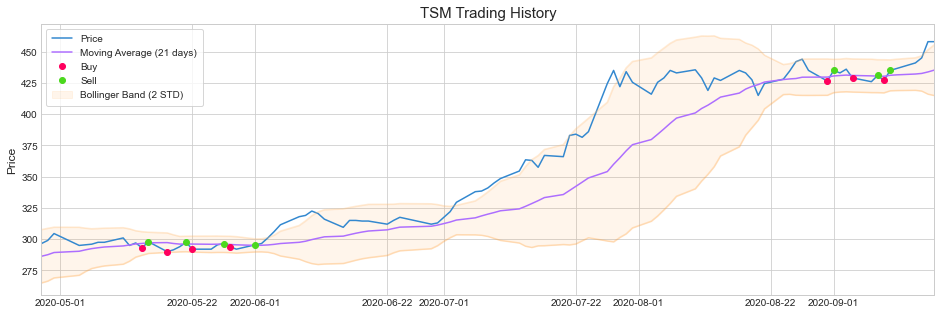

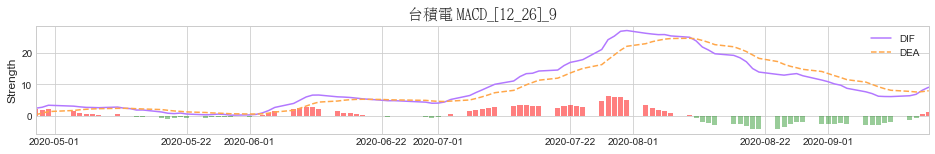

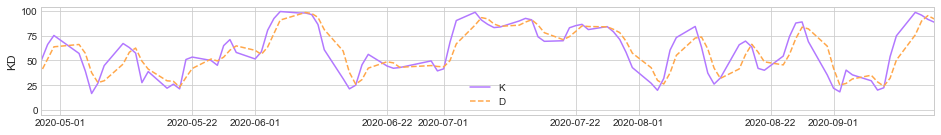

In [32]:
daily_trade(df11,coms=coms[1],coms_t=coms_t[1])